## Linear Regression

<img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png">

### Motivation

Why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

### Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="images/08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="images/08_slope_intercept.png">

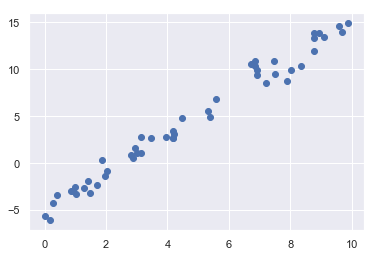

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

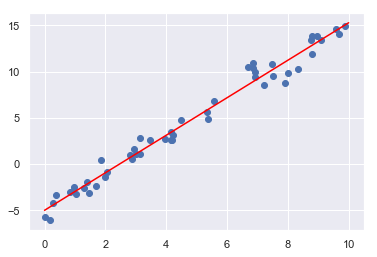

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are ``coef_`` and ``intercept_``:

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


We see that the results are very close to the inputs, as we might hope.

## How well the model scored?

The best possible score is **1.0** and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a score of **0.0**.

In [5]:
model.score(x[:, np.newaxis], y)

0.9790800609430612

## Predict new value

Using ``predict`` method, we can estimate the new response value

In [6]:
# predict for a new observation
X_new = np.array([[2.5]])
model.predict(X_new)

array([0.06944494])

In [7]:
model.predict(np.array([[2.5]]))

array([0.06944494])

### How Well Does the Model Fit the data?

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

Where, 
$$SS_{tot} = \sum_i (y_i - \bar y)^2$$
$$SS_{res} = \sum_i (y_i - \hat y_i)^2$$

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.

See [this image](https://en.wikipedia.org/wiki/Coefficient_of_determination#/media/File:Coefficient_of_Determination.svg) for an other intuitive explanation.

Sklearn has quality metrics that we can use! <br>
``from sklearn.metrics import r2_score, mean_squared_error``

In [8]:
from sklearn.metrics import r2_score, mean_squared_error

## Exercise
### Create your first Linear Regression model

Given the following X and y, train a linear model and show the results!

- Fit a linear regression, choose ``fit_intercept=True``
- Print the slope and the intercept
- Print the Mean Squared Error and the R2 value
- Plot the original data points and your regression line
- What happend if you use ``fit_intercept=False``

In [9]:
rng = np.random.RandomState(1)
X = 100 * rng.rand(50)
y = -26 * X - 50 + rng.randn(50)*100

In [10]:
print(X.shape)
print(y.shape)

(50,)
(50,)


In [11]:
# Creating a linear regression model
model = LinearRegression(fit_intercept=True)

In [12]:
# add one more dimension. This is requirement of sklearn in model.fit()
X[:,np.newaxis].shape

(50, 1)

In [13]:
# fitting the model to data
model.fit(X[:,np.newaxis],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# print slope and intercept

print(model.coef_)
print(model.intercept_)

[-25.7279119]
-49.85770855532087


In [15]:
# Use the trainned model, predict new y values for X[:,np.newaxis]

ypred = model.predict(X[:,np.newaxis])
ypred.shape

(50,)

In [16]:
# print mean squared error and r2_score

print(mean_squared_error(y, ypred))
print(r2_score(y, ypred))

8183.388570266164
0.9869079770346171


In [17]:
# compare to use of score() function.

model.score(X[:,np.newaxis], y)

0.9869079770346171

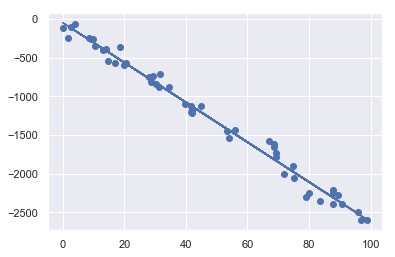

In [18]:
# show a plot with the data points and with the regression line

plt.scatter(X, y)
plt.plot(X, ypred)

### Multidimensional linear regression
The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$

where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [19]:
X.shape

(50,)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) # rand() create 3 dimensions of 100 random numbers between 0.0 to 1.0
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + np.random.randn(100)

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.4722667926466999
[ 1.50607988 -2.0178006   1.02574157]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data. It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Exercise 
### Effects of TV, Radio and Newspaper advertising on Sales

Read the csv data from http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv where

The features are:
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

and the response is:
- Sales: sales of a single product in a given market (in thousands of widgets)

Explore the data and find out the answers for the following questions:
- Is there a relationship between ads and sales?
- How strong is that relationship?
- Which ad types contribute to sales?
- What is the effect of each ad type of sales?
- Given ad spending in a particular market, can sales be predicted?

In [21]:
# read data into a DataFrame

In [22]:
import pandas as pd
df = pd.read_csv('Data/Advertising.csv', index_col=0)
df.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

#### Linear Regression

Develop a simple LinearRegression for each feature i.e. TV, Radio, Newspaper against Sales. Plot the data (target against the feature) and the fitted line on the same plot. 

In [23]:
## TV vs Sales
# fit the model
# plot the data
# plot the fitted model (a straight line)
# print slop and intercept

In [24]:
y = df.sales
X = df.TV

model = LinearRegression(fit_intercept=True)
model.fit(X[:,np.newaxis],y)
model.score(X[:,np.newaxis], y)

0.611875050850071

In [25]:
ypred = model.predict(X[:,np.newaxis])

In [26]:
r2_score(y,ypred)

0.611875050850071

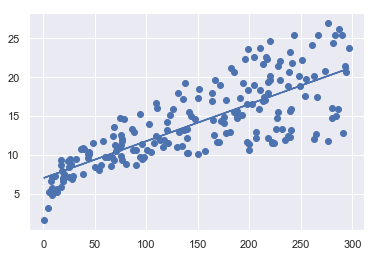

In [27]:
plt.scatter(X, y)
plt.plot(X, ypred)

In [28]:
print("intercept", model.intercept_)
print("coef", model.coef_)

intercept 7.032593549127693
coef [0.04753664]


In [29]:
# Lets make this into a function!

In [30]:
def fit_and_plot(name, df, y_col, x_col):
    
    y = df[y_col]
    X = df[x_col]
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X[:,np.newaxis],y)
    ypred = model.predict(X[:,np.newaxis])
    
    print(name)
    print("intercept", model.intercept_)
    print("coef", model.coef_)
    print("R2", r2_score(y, ypred))
    
    plt.scatter(X, y)
    plt.plot(X, ypred)
    plt.show();

TV vs Sales
intercept 7.032593549127693
coef [0.04753664]
R2 0.611875050850071


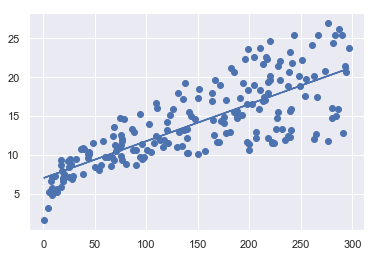

In [31]:
fit_and_plot('TV vs Sales', df, 'sales', 'TV')

TV
intercept 7.032593549127693
coef [0.04753664]
R2 0.611875050850071


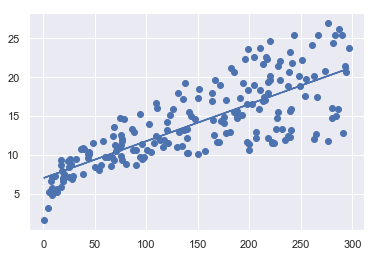

radio
intercept 9.311638095158283
coef [0.20249578]
R2 0.33203245544529525


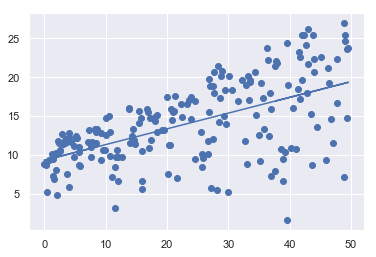

newspaper
intercept 12.35140706927816
coef [0.0546931]
R2 0.05212044544430516


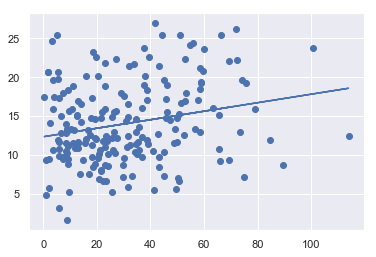

In [32]:
for item in ['TV', 'radio', 'newspaper']:
    fit_and_plot(item, df, 'sales', item)

### Your turn now...


Create a linear regression plot for:
- Radio vs. Newspaper
- TV vs. Newspaper

#### Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$$ y=\beta_0+\beta_1x_1+...+\beta_nx_n$$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$$y=\beta_0+\beta_1×TV+\beta_2×Radio+\beta_3×Newspaper$$

In [33]:
## Multiple Linear Regression
# print model coefficients and intercept

In [34]:
X.shape

(200,)

In [35]:
model = LinearRegression(fit_intercept=True)
X = df[['TV', 'radio', 'newspaper']]
y = df.sales

model.fit(X, y) 
ypred = model.predict(X) 

print('R2', r2_score(y,ypred))
print('intercept', model.intercept_)
print('coef', model.coef_)

R2 0.8972106381789522
intercept 2.9388893694594067
coef [ 0.04576465  0.18853002 -0.00103749]


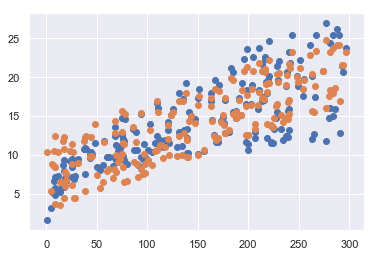

In [36]:
Xfit = np
plt.scatter(df.TV[:,np.newaxis], df.sales)
plt.scatter(df.TV[:,np.newaxis], ypred)

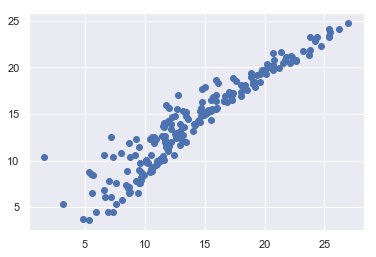

In [37]:
plt.scatter(y, ypred)

Plot the three features vs Sales and also the fitted line. (three plots)

#### Predict New Observation

Predict the Sales for advertisement spending TV=100, Radio=25 and Newspaper=25 respectively.

In [38]:
## Prediction
model.predict([[100, 25, 25]]) # take note of the format of data. It is array within array

array([12.20266701])

## Train and Test a Mulitdimensional Linear Regression

We can use sklearn's ``train_test_split`` function to divide the data into 2 sets for us. 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) # again, 3 dimensions
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + np.random.randn(100)

In [41]:
X.shape

(100, 3)

In [42]:
y.shape

(100,)

In [43]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, test_size=0.5)

In [44]:
X1.shape

(50, 3)

In [45]:
sum(sum(X1))

814.2199266316203

In [46]:
X1, X2, y1, y2 = train_test_split(X, y,random_state=0,test_size=0.5)

In [47]:
print(X1.shape)
print(y1.shape)
print(X2.shape)
print(y2.shape)

(50, 3)
(50,)
(50, 3)
(50,)


We fit the Multidimensional Linear Regression. We print the Intercept and the coefficients.

In [48]:
lr = LinearRegression().fit(X1,y1)

In [49]:
print(lr.intercept_)
print(lr.coef_)

0.6168725215239328
[ 1.45119978 -1.94741448  0.97578588]


Now we use the model to predict the training data. <br>
We import some regression quality metrics from sklearn.

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [51]:
y1_pred = lr.predict(X1)
print("R2", r2_score(y1_pred, y1))
print("MSE", mean_squared_error(y1_pred, y1))
print("MAE", mean_absolute_error(y1_pred, y1))

R2 0.9883551797675074
MSE 0.8067449269570436
MAE 0.7239912808607536


In [52]:
y2_pred = lr.predict(X2)
print("R2", r2_score(y2_pred, y2))
print("MSE", mean_squared_error(y2_pred, y2))
print("MAE", mean_absolute_error(y2_pred, y2))

R2 0.9785020737405454
MSE 1.159831987002647
MAE 0.8969564740695397


** Question: Is this a good or a bad performance? **

In [53]:
print("mean", np.mean(y))

mean 1.4722742862602445


In [54]:
print("std", np.std(y))

std 7.973475099623433


### Explore Scikit Learn's datasets

Sklearn provides us with sample datasets. <br>
Let's do this in class together.

- google for sklearn datasets
- load diabetes data set
- check the keys: 'data', 'target', 'DESCR', 'feature_names'
- print description
- create X matrix and y vector

In [55]:
# in-class, codes here

In [56]:
from sklearn.datasets import load_diabetes

In [57]:
diabetes = load_diabetes()

In [58]:
type(diabetes)

sklearn.utils.Bunch

In [59]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [60]:
# DESCR

In [61]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [62]:
# target

In [63]:
y = diabetes.target

In [64]:
y.shape

(442,)

In [65]:
# data

In [66]:
X = diabetes.data

In [67]:
X.shape

(442, 10)

In [68]:
# feature_names

In [69]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions. The idea is to take our multidimensional linear model:

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$
 
and build the $x_1$, $x_2$, $x_3$ and so on, from our single-dimensional input $x$. That is, we let  $x_n=f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if  $f_n(x)=x^n$ , our model becomes a polynomial regression:

$$y=\beta_0+\beta_1x_1+\beta_2x^2+\beta_3x^3⋯+\beta_nx^n$$
 
Notice that this is still a linear model—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other. What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

For example $[a]$ will be converted into $[1,a,a^2]$ for degree 2.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer.

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [70]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False) # degree of 3, bias can be removed by include_bias=False
poly.fit_transform(x[:, None])

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

By using the scikit-learn's [``pipeline``](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), we can make a 7th-degree polynomial model

In [98]:
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

In [99]:
poly_model

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [100]:
poly_model.steps[1]

('linearregression',
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False))

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. For example, here is a sine wave with noise:

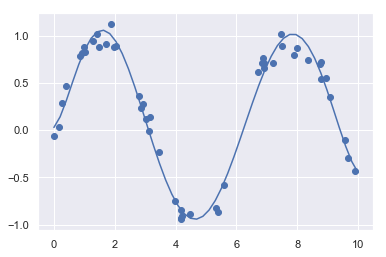

In [101]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 50)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit); # change the degree from 1 to 7 and check the resulting chart

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

In [97]:
poly_model.steps[1][1].intercept_

0.02847262601913647

In [171]:
poly_model.steps[1][1].coef_

array([ 0.00000000e+00,  3.31250194e-01,  1.28845778e+00, -1.06474496e+00,
        2.90659230e-01, -3.57011703e-02,  2.01614685e-03, -4.20513337e-05])

## Exercise
### Boston Housting Dataset : Linear Regression with Polynomial Features

Load the sklearn dataset of the [Boston house prices](https://archive.ics.uci.edu/ml/datasets/housing) (link to the description). The Boston house prices is a dataset designated for testing and learning machine learning tools, it comes with a description of the dataset. 

#### Part 1.

Answer the following questions:
- Describe the summary of the data
- Divide into train 80% and test 20%
- Perform multiple linear regression and determine:
    - The Mean Squared Error and $R^2$ value
    - The coefficients and intercept values

#### Part 2.

Try to get a better Mean Squared Error on the Boston prediction task using polynomial features.

- Fit model using poly_model pipeline using degree 2
- Show coefficients
- Show Mean Squared Error and R2 performance measures for train and test prediction
- Try this for degrees 1,2,3,4
- What performs the best? What are your observations?

### Part 1

In [174]:
# load the data

In [106]:
from sklearn import datasets

In [107]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [108]:
X = boston.data
y = boston.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(404, 13) (404,)
(102, 13) (102,)


In [110]:
# fit the model

In [111]:
model = LinearRegression(fit_intercept=True)
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
# print coefficients

In [113]:
print("intercept", model.intercept_)
print("coef", model.coef_)

intercept 38.09169492630246
coef [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]


In [114]:
# scores

In [115]:
print("Train R2", model.score(Xtrain, ytrain))
print("Test R2", model.score(Xtest, ytest))

Train R2 0.7730135569264234
Test R2 0.5892223849182507


### Part 2

In [186]:
# instantiate poly model

In [187]:
degree = 2 
poly_model = make_pipeline(PolynomialFeatures(degree),
                           LinearRegression())

In [188]:
# fit polymodel
# same as LinearRegression model !

In [189]:
poly_model.fit(Xtrain, ytrain)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [190]:
# print coefficient

In [191]:
poly_model.steps[1][1].coef_

array([ 1.07346026e+09, -2.97510205e+00,  2.50017017e-01, -5.75261979e+00,
        1.46944572e+01,  2.74617636e+01,  7.40199263e+00,  1.12613783e+00,
       -1.25447428e+01,  1.58814891e+00,  2.57078562e-02,  3.99790890e+00,
       -1.36816479e-01, -1.46480161e+00,  3.05609658e-03,  2.84330181e-01,
        6.11066785e-01,  1.38035009e+00, -2.89001788e-01,  1.00766741e-01,
       -5.43540783e-03,  2.08495666e-03,  4.88227797e-01, -4.39740462e-02,
        4.34919849e-01, -1.98328444e-04,  2.18121807e-02, -9.33846955e-04,
       -1.25699281e-03,  7.38675176e-02, -1.67405073e+00, -7.68556797e-03,
       -1.31535227e-04, -8.45662161e-04, -4.79350217e-04,  6.85393430e-04,
       -2.28277097e-02,  2.07056574e-03, -3.07902288e-03,  4.67327370e-02,
        5.45977285e-01, -3.49428110e-02,  4.66222468e-01,  1.84068925e-03,
        6.68200261e-02, -2.69658063e-01,  3.09657143e-03, -1.36644525e-01,
        9.79344685e-03,  1.22866400e-02,  1.46944572e+01, -3.31269439e+01,
       -5.99197428e+00,  

In [192]:
len(poly_model.steps[1][1].coef_)

105

In [193]:
# score

In [194]:
print("Train R2", poly_model.score(Xtrain, ytrain))
print("Test R2", poly_model.score(Xtest, ytest))

Train R2 0.9258881792973005
Test R2 0.6903318087143496


In [195]:
# try for degrees 1-4

In [196]:
for degree in range(1,5):
    poly_model = make_pipeline(PolynomialFeatures(degree),
                           LinearRegression())
    poly_model.fit(Xtrain, ytrain)
    
    print("Degree:", degree)
    print("No. Coeffs:", len(poly_model.steps[1][1].coef_))
    print("R2 Train:",poly_model.score(Xtrain, ytrain))
    print("R2 Test:",poly_model.score(Xtest, ytest))
    print(" ")

Degree: 1
No. Coeffs: 14
R2 Train: 0.7730135569264234
R2 Test: 0.5892223849182507
 
Degree: 2
No. Coeffs: 105
R2 Train: 0.9258881792973005
R2 Test: 0.6903318087143496
 
Degree: 3
No. Coeffs: 560
R2 Train: 0.9999999999997315
R2 Test: -12898.30979391929
 
Degree: 4
No. Coeffs: 2380
R2 Train: 1.0
R2 Test: -12050.77764934759
 


In [197]:
# check poly features
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [198]:
nr_features = 4
degree = 6

original = Xtrain[:,-nr_features:]

poly = PolynomialFeatures(degree, include_bias=False)
transformed = poly.fit_transform(original)
print("degree", degree)
print("original", original.shape)
print("transformed", transformed.shape)

degree 6
original (404, 4)
transformed (404, 209)
